# Your first Recurrent Neural Network (RNN)

🙌 Welcome to RNN! After using CNN in the previous lesson to deal with images (spatial data), you are going to deal with time-related data (***temporal data***).

🎯 Goals of this warm-up challenge:
1. Understand what temporal data is
2. Build your first Recurrent Neural Network



## (1) The dataset

🔢 Imagine that we have access to some data about employees in a company.

In [1]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [13]:
# X.shape, y.shape
X[0][9]

array([  5.199,  39.   , 108.   ], dtype=float32)

☝️ The dataset describes the evolution of the **employment status of 25 000 employees, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising  3 components
- the salary,
- the number of people under someone's responsability,
- the size of the company. 

🕵🏻 To understand the dataset a bit better, let's show the data of the first employee.

In [3]:
import pandas as pd

employee_0 = pd.DataFrame(X[0],
                          columns=['salary',
                                   'responsability',
                                   'company_size'])
round(employee_0,2)

,salary,responsability,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


🎯 The goal in this challenge is to predict the montly salary on the 11th year for each of these 25000 employees, based on the past observations.

In [4]:
# For example, the first employee earns 6.499 k USD per month
# during the 11th year at the company
y[0]

6.499

In [17]:
X.shape

(25000, 10, 3)

📈 To help you get a better understanding about the evolution of the salaries, the number of people under their responsbility and the company size over the years, you can run the cell down below. Do you visually detect some correlations between these three variables ?

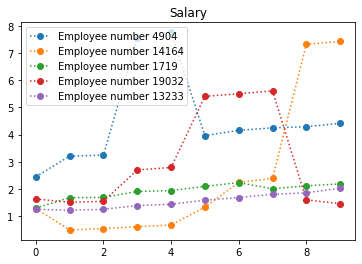

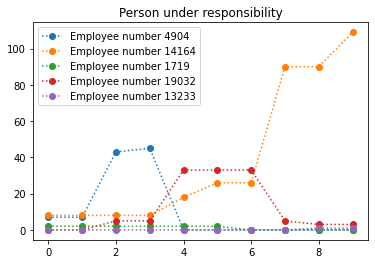

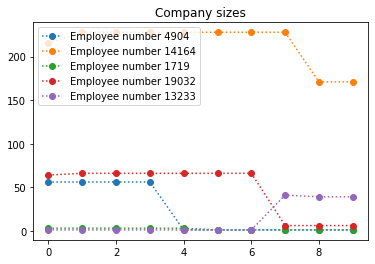

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)
number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0, 
                                     number_of_employees,
                                     number_of_randomly_selected_employees)

# As the employees are selected randomly, feel free to re-run this cell a few times !

plt.title('Salary')

for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Person under responsibility')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

❓ **Question** ❓ Plot the distribution of:
* all the salaries during the 10th yaer, 
* people under someone's responsibility, 
* and the company sizes 

to get a better understanding of the variability of observations

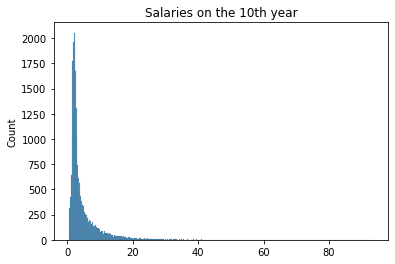

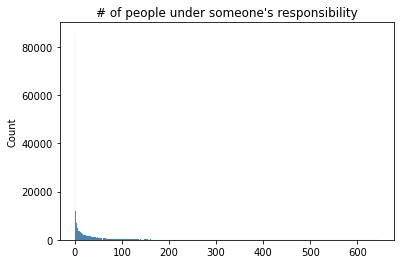

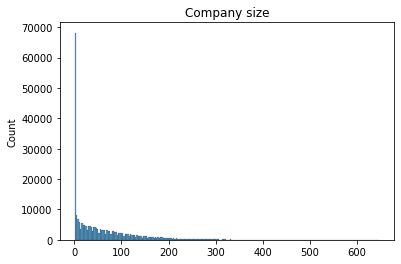

In [16]:
# YOUR CODE HERE
import seaborn as sns

plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten())
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten())
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten())
plt.show()

❓ **Question** ❓  Split your dataset between a train and test set (80/20)

In [18]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


## (2) A Simple RNN

🤗 Now that you are familiar with this company's dataset, you will create your first Recurrent Neural Network. Let's start with a simple architecture.

❓ **Question** ❓ Write a model that has: 
- a ***Normalization*** layer adapted on the training set
- a ***SimpleRNN*** layer with 20 *units* (don't forget that `tanh` is better suited as an activation function for a Recurrent Layer)
- a ***Dense*** layer with 10 neurons
- a ***Dense*** layer specific to your task (= to ***predict*** a salary)

👩🏻‍🏫 <u>Remember</u>: You don't need to specify an `input_shape`: as soon as your Normalizer has been adapted to your train set, it has memorized the input shape!

In [20]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten

In [21]:
# YOUR CODE HERE
normalizer = Normalization()
normalizer.adapt(X_train)

# Building the RNN architecture
model = Sequential()
model.add(normalizer)
model.add(SimpleRNN(units=20, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

2022-05-12 21:07:34.986871: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❓ **Question**: How many trainable does your RNN have ❓

In [22]:
# YOUR CODE HERE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, None, 3)          7         
 n)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 708
Trainable params: 701
Non-trainable params: 7
_________________________________________________________________


❓ **Question** ❓ Try to recompute the number of parameters manually.


> YOUR ANSWER HERE

❓ **Question** ❓ Compile your model. For RNN, we recommend you to use the ***rmsprop*** optimizer (instead of *adam*).

In [23]:
# YOUR CODE HERE
def compile_model(model):
    model.compile(loss='mse',
                  optimizer='rmsprop', 
                  metrics=['mae'])
    return model

model = compile_model(model)

❓ **Questions** ❓ 

* Run your model on your training dataset:
    * use a Validation Split of 20%
    * and an Early Stopping Criterion with patience $= 5 $
* Evaluate your performance on the test set

In [24]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=32, 
                    epochs=100, 
                    callbacks=[es],
                    verbose=1)

Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: 13.7972 - mae: 1.5163 - val_loss: 3.7966 - val_mae: 0.6988
Epoch 2/100
500/500 [==============================] - 1s 3ms/step - loss: 2.6121 - mae: 0.5755 - val_loss: 1.5218 - val_mae: 0.4709
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 1.6270 - mae: 0.4576 - val_loss: 1.0932 - val_mae: 0.4439
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 1.3046 - mae: 0.4156 - val_loss: 0.8848 - val_mae: 0.3637
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 1.1297 - mae: 0.3977 - val_loss: 0.8878 - val_mae: 0.5092
Epoch 6/100
500/500 [==============================] - 1s 3ms/step - loss: 1.0409 - mae: 0.3930 - val_loss: 0.7405 - val_mae: 0.3861
Epoch 7/100
500/500 [==============================] - 1s 3ms/step - loss: 1.0276 - mae: 0.3990 - val_loss: 0.6569 - val_mae: 0.3302
Epoch 8/100
500/500 [==============================] - 2s 5ms/step -

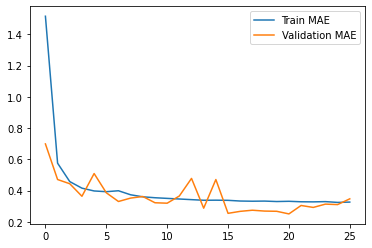

In [27]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [28]:
model_mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {model_mae[1]:.4f}')

Model Mean Absolute Error 0.2486


## (3) Baseline comparison

❗️**Important Reminder**❗️ : Always remember to compare your Deep Learning models, and more generally any Machine Learning model, to a baseline. 

🧑🏻‍🏫 Remember that our goal is to predict the salary of the employees for the 11th year. It is a ***Regression Task***. What baseline could we build ? 
1. In the case of a traditional regression model, a baseline prediction for `y_test` is  to **predict the average of `y_train`**... but this option could be irrelevant for time-related series. Theoretically, someone's salary is supposed to increase of the year s!
2. An alternative baseline prediction for a regression task is to **predict the last seen value**

❓ **Questions** ❓ 
* Compute the Mean Absolute Error of a baseline model that would predict that the salary remains constant between the 10-th and 11-th year
* Compare this baseline model to your RNN

In [29]:
# YOUR CODE HERE
def constant_prediction(X, y):
    errors = []
    for xx, yy in zip(X, y):
        last_salary = xx[-1][0]        # Using the 10th salary to predict the 11th salary
        errors.append(yy - last_salary)
        
    return errors

errors_baseline = constant_prediction(X, y)
mae_baseline = np.mean(np.abs(errors_baseline))

print(f'Baseline MAE = {mae_baseline:.3f}')
print("vs.")
print(f'RNN MAE = {model_mae[1]:.3f}')

Baseline MAE = 0.595
vs.
RNN MAE = 0.249


😁 You should notice that your RNN performs a bit better than a baseline model.

## (4) LSTM: Long-Short Term Memory

❓ **Questions** ❓ 

* Write the exact same model, but with a `LSTM` instead of a `SimpleRNN`
* Evaluate your performance on the test set

In [30]:
# YOUR CODE HERE
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

model_LSTM = Sequential()
model_LSTM.add(normalizer)
model_LSTM.add(LSTM(units=20, activation='tanh'))
model_LSTM.add(Dense(10, activation='relu'))
model_LSTM.add(Dense(1, activation='linear'))

model_LSTM = compile_model(model_LSTM)

es = EarlyStopping(patience=5, restore_best_weights=True)

history_LSTM = model_LSTM.fit(X_train, y_train,
                              validation_split=0.2,
                              batch_size=32, 
                              epochs=100,
                              callbacks=[es],verbose=1)

Epoch 1/100
500/500 [==============================] - 4s 5ms/step - loss: 17.5851 - mae: 1.8831 - val_loss: 4.3451 - val_mae: 0.8211
Epoch 2/100
500/500 [==============================] - 2s 3ms/step - loss: 2.6752 - mae: 0.5821 - val_loss: 1.2206 - val_mae: 0.4369
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 1.2264 - mae: 0.3628 - val_loss: 0.7304 - val_mae: 0.2999
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 0.9690 - mae: 0.3380 - val_loss: 0.6583 - val_mae: 0.3565
Epoch 5/100
500/500 [==============================] - 2s 3ms/step - loss: 0.8784 - mae: 0.3287 - val_loss: 0.5683 - val_mae: 0.2890
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 0.7992 - mae: 0.3196 - val_loss: 0.5467 - val_mae: 0.2627
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.7549 - mae: 0.3162 - val_loss: 0.5482 - val_mae: 0.3161
Epoch 8/100
500/500 [==============================] - 2s 4ms/step -

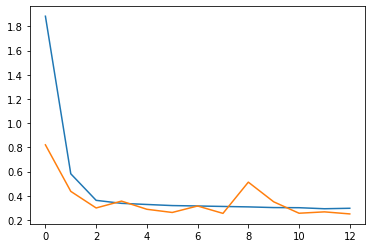

In [31]:
 plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

💪 The LSTM should perform a bit better than the SimpleRNN with a lower MAE.

🏁 Congratulations ! You know how to run a RNN on sequential data.
 

💾 Do not forget to git add/commit/push your notebook...

🚀 ... and move to the next challenge !

---

<u>Note</u>: The sequences you worked with are totally fake. In case, you need to train and reproduce similar data, you can find below the functions that have been used to simulate such a dataset.

## (Utils)

In [32]:
def create_sequences(number):
    X, y = [], []
    
    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)
        
    return np.array(X), np.array(y)
            
def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []
    
    
    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length
    
    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities 
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)
    
    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)
        
    
    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)
        
        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]
    
    return np.array([salaries, nb_persons, company_sizes]).T, y

In [34]:
X, y = create_sequences(25000)

np.save('X', X.astype(np.float32))
np.save('y', y)